In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

print("all libraries successfully imported")

all libraries successfully imported


In [4]:
data=pd.read_excel("/content/compiled_risk_data.xlsx")

data.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [5]:
data.columns

Index(['project_name', 'Smart contract address', 'Blog post link',
       'Audit website', 'Chain', 'Is_closed_source', 'hidden_owner',
       'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax',
       'sell_tax', 'slippage_modifiable', 'Is_blacklisted',
       'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam',
       'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token',
       'illegal_unicode', 'exploitation', 'bad_contract',
       'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths',
       'Summary/rationale of risk tags marked true'],
      dtype='object')

In [6]:
data_new = data.copy()

feature_1 = 'centralized_risk_high'
feature_2 = 'centralized_risk_medium'
feature_3 = 'external_dependencies'
selected_features = data_new[[feature_1, feature_2,feature_3]].replace({True:1, False:0})
print("Features selected for clustering:")

print(selected_features.head())


Features selected for clustering:
   centralized_risk_high  centralized_risk_medium  external_dependencies
0                      0                        1                      1
1                      0                        0                      1
2                      0                        0                      1
3                      0                        1                      0
4                      0                        0                      1


In [7]:
from scipy.spatial.distance import pdist, squareform

distance_matrix = pdist(selected_features, 'jaccard')
distance_square_matrix = squareform(distance_matrix)

In [8]:
import scipy.cluster.hierarchy as sch

linkage_matrix = sch.linkage(distance_matrix, method='ward')

In [9]:
linkage_matrix

array([[0.00000000e+00, 5.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [4.00000000e+00, 1.09400000e+03, 0.00000000e+00, 3.00000000e+00],
       ...,
       [2.12500000e+03, 2.17900000e+03, 8.43835231e+00, 2.35000000e+02],
       [2.18100000e+03, 2.18200000e+03, 1.00943397e+01, 5.18000000e+02],
       [2.17700000e+03, 2.18300000e+03, 2.04257451e+01, 1.09300000e+03]])

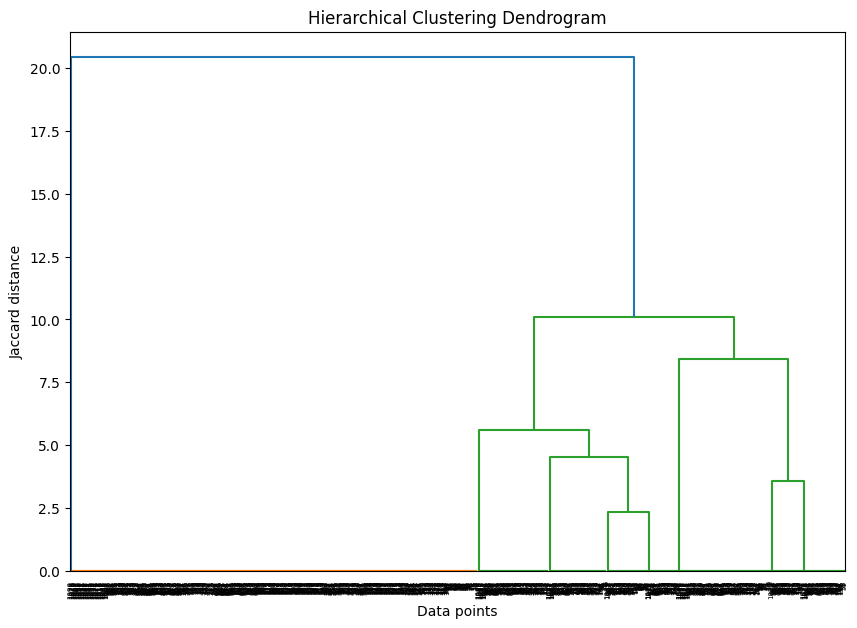

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()


In [11]:
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')


data_new['cluster'] = cluster_labels

cluster_summary = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').agg(['mean', 'std', 'median', 'count'])
cluster_summary

centralized_risk_high                        centralized_risk_medium  \
                         mean       std median count                    mean   
cluster                                                                        
1                    0.000000  0.000000    0.0   575                     0.0   
2                    0.000000  0.000000    0.0   100                     1.0   
3                    0.551913  0.498662    1.0   183                     1.0   
4                    0.000000  0.000000    0.0   131                     0.0   
5                    1.000000  0.000000    1.0   104                     0.0   

                          external_dependencies                         
         std median count                  mean       std median count  
cluster                                                                 
1        0.0    0.0   575              0.000000  0.000000    0.0   575  
2        0.0    1.0   100              0.000000  0.000000    0.0   100  
3        0.0    1.0   183              0.765027  0.425145    1.0   183  
4        0.0    0.0   131              1.000000  0.000000    1.0   131  
5        0.0    0.0   104              0.432692  0.497848    0.0   104

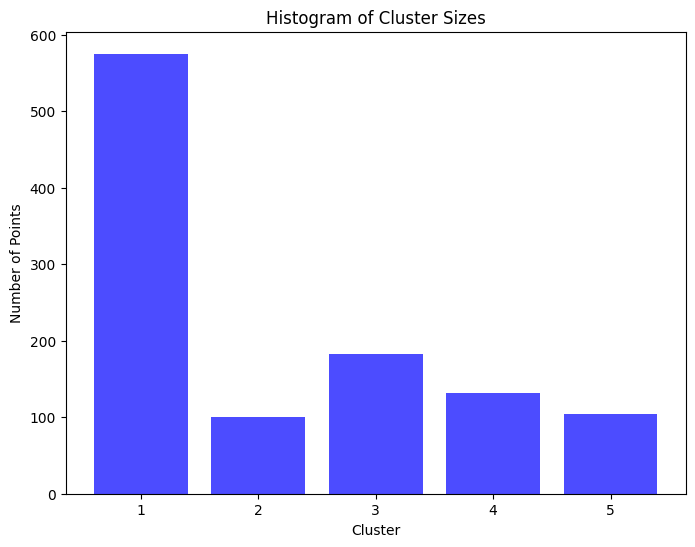

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

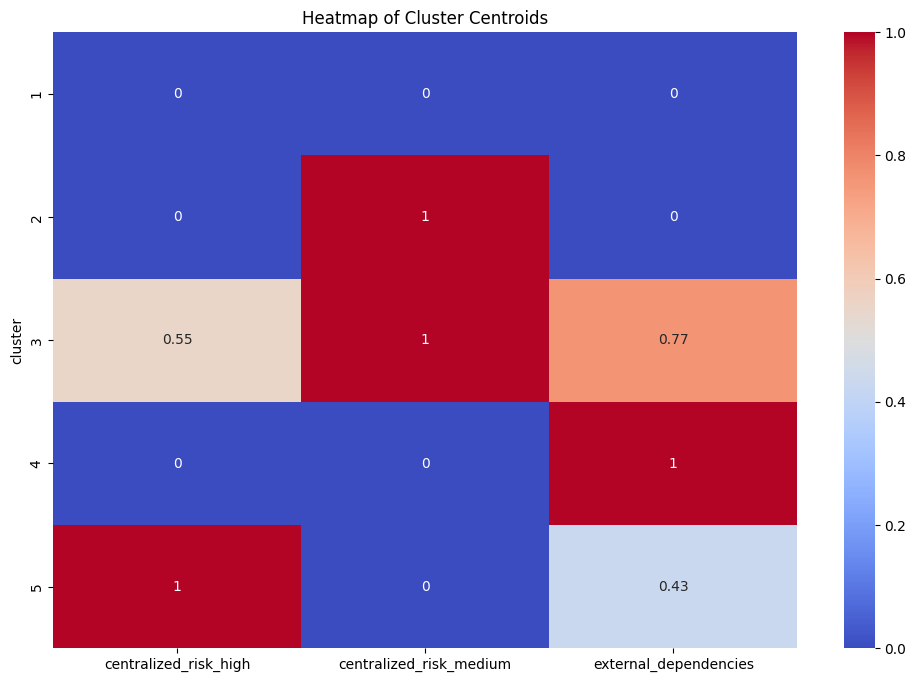

In [13]:
cluster_centers = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()